## 학습 곡선으로 편향과 분산 문제 분석

학습 곡선은 과대적합(높은 분산) 또는 과소적합(높은 편향)되는지 분석할때 유용하다.<br/>

과대적합, 과소적합 문제를 해결하는 방법으로 훈련셋의 크기를 조정하는 방법이 있다.<br/> 
모델의 훈련 정확도와 검증 정확도를 훈련셋의 크기 함수로 그래프를 그리면, 훈련셋을 늘리는 것으로 과대/과소적합 문제를 해결할 수 있을지 판단이 가능하다.<br/>

유방암 데이터셋을 사용해서 학습 곡선을 그려보면 다음과 같다. 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv(   # 위스콘신 유방암 데이터셋 로딩
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
    header=None
)

x = df.loc[:, 2:].values    # 30개의 특성을 x에 할당
y = df.loc[:, 1].values     # 클래스 레이블을 y에 할당
y = LabelEncoder().fit_transform(y) # 클래스 레이블을 정수로 변환(악성: 1, 양성: 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=1)

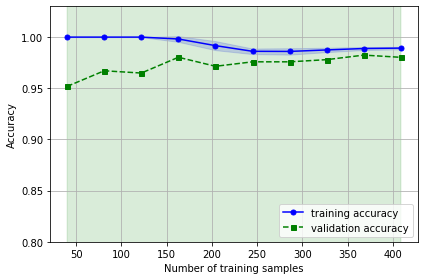

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear', penalty='l2', random_state=1)
)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=x_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 학습곡선을 생성하는데 사용할 훈련 샘플의 개수나 비율을 지정
    # 기본적으로 learning_curve 함수는 계층별 k-겹 교차 검증을 사용하여 교차 검증 정확도를 계산한다.
    cv=10,                                  # 교차 검증에 사용할 k값을 설정
    n_jobs=1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.mean(test_scores, axis=1)

# 훈련셋 크기별로 훈련 교차 검증 점수의 평균 정확도 변화를 표현
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
# fill_between 함수로 훈련셋의 평균 정확도와 표준 편차를 그려서 추정 분산을 표현
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

# 훈련셋 크기별로 테스트 교차 검증 점수의 평균 정확도 변화를 표현
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
# fill_between 함수로 테스트셋의 평균 정확도와 표준 편차를 그려서 추정 분산을 표현
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

그래프를 분석하는 방법은 다음과 같다. 

훈련 정확도와 검증 정확도가 모두 기대보다 낮은 정확도에 있다면 과소적합된 것이다.<br/> 
이 경우, 모델의 특성을 더 찾아서 늘리거나 규제 강도를 줄여볼 수 있다.<br/>

훈련 정확도와 검증 정확도의 차이가 크면 과대적합된 것이다.<br/>
이 경우, 더 많은 데이터를 모으거나 모델의 복잡도를 낮추거나 규제의 강도를 올려볼 수 있다<br/>

훈련 정확도와 검증 정확도가 모두 기대 정확도에 근접하게 수렵하면 좋은 편향과 분산을 가졌다고 볼 수 있다.<br/> 

유방암 데이터셋의 학습 곡선은 훈련셋이 250개 이하일때 과대적합이 된다.<br/>






